# ML5.5 EDA Предобработка данных

In [303]:
import pandas as pd
import numpy as np
import seaborn as sns

In [304]:
import matplotlib.pyplot as plt
%matplotlib inline

In [305]:
training_set = pd.read_csv('C:\\Users\\222844\\Downloads\\titanic.csv')
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [306]:
training_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [307]:
training_set.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


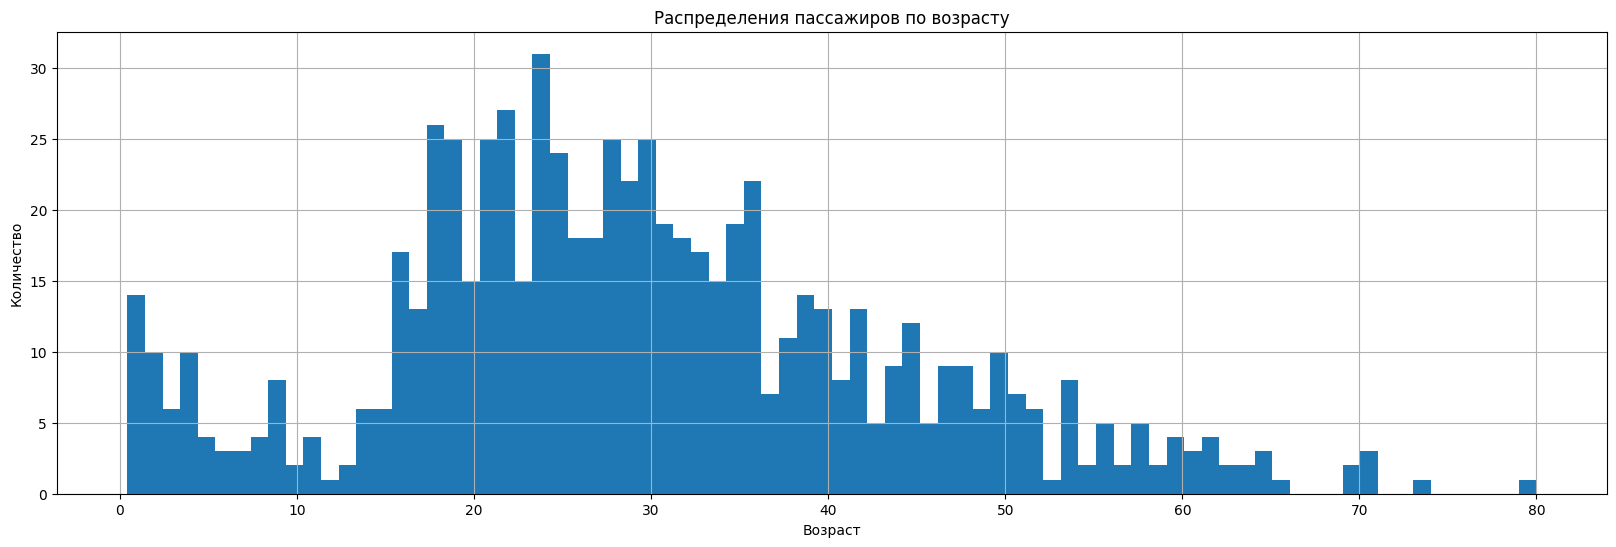

In [308]:
def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, int(training_set.max()) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

custom_hist(training_set["Age"], 'Распределения пассажиров по возрасту', 'Возраст')

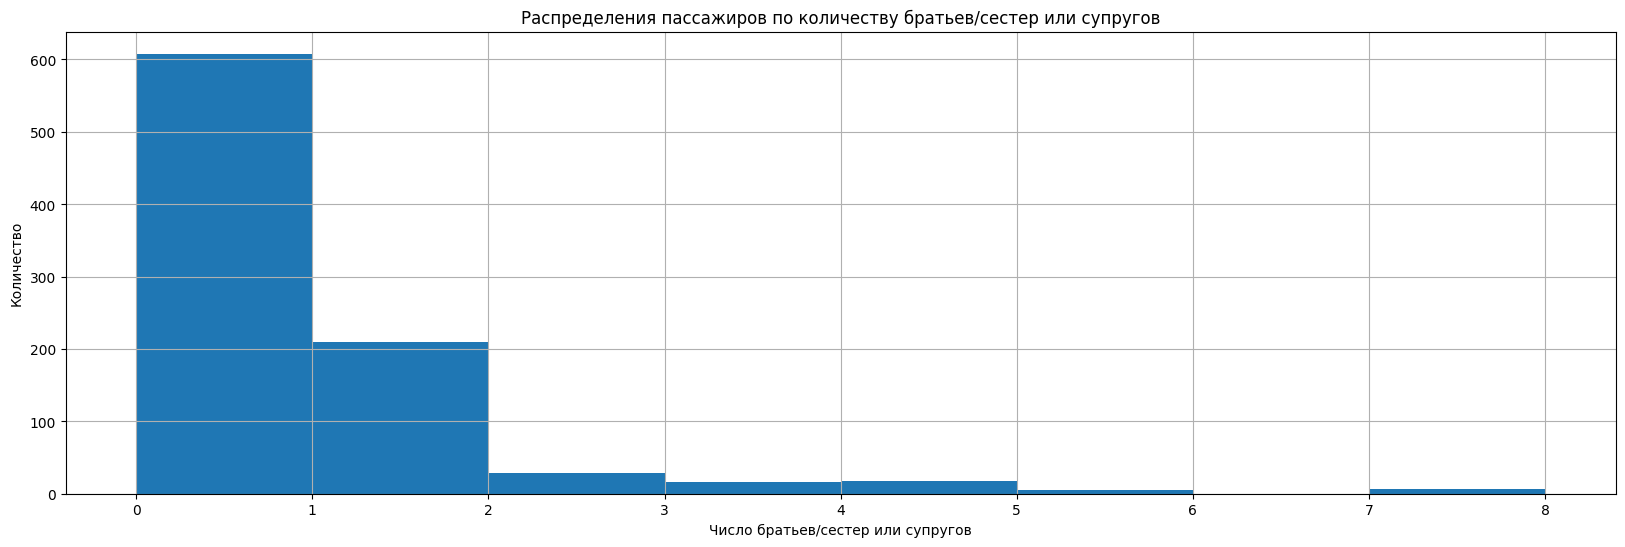

In [309]:
custom_hist(training_set["SibSp"], 'Распределения пассажиров по количеству братьев/сестер или супругов', 'Число братьев/сестер или супругов')

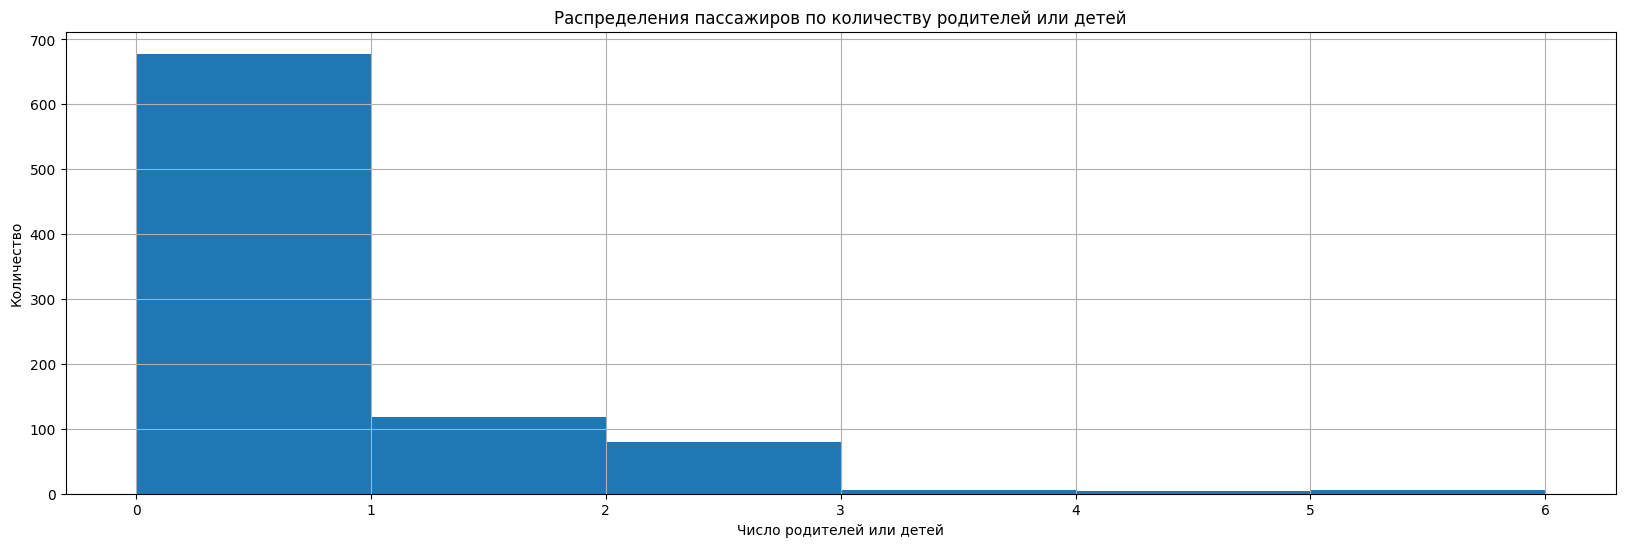

In [310]:
custom_hist(training_set["Parch"], 'Распределения пассажиров по количеству родителей или детей', 'Число родителей или детей')

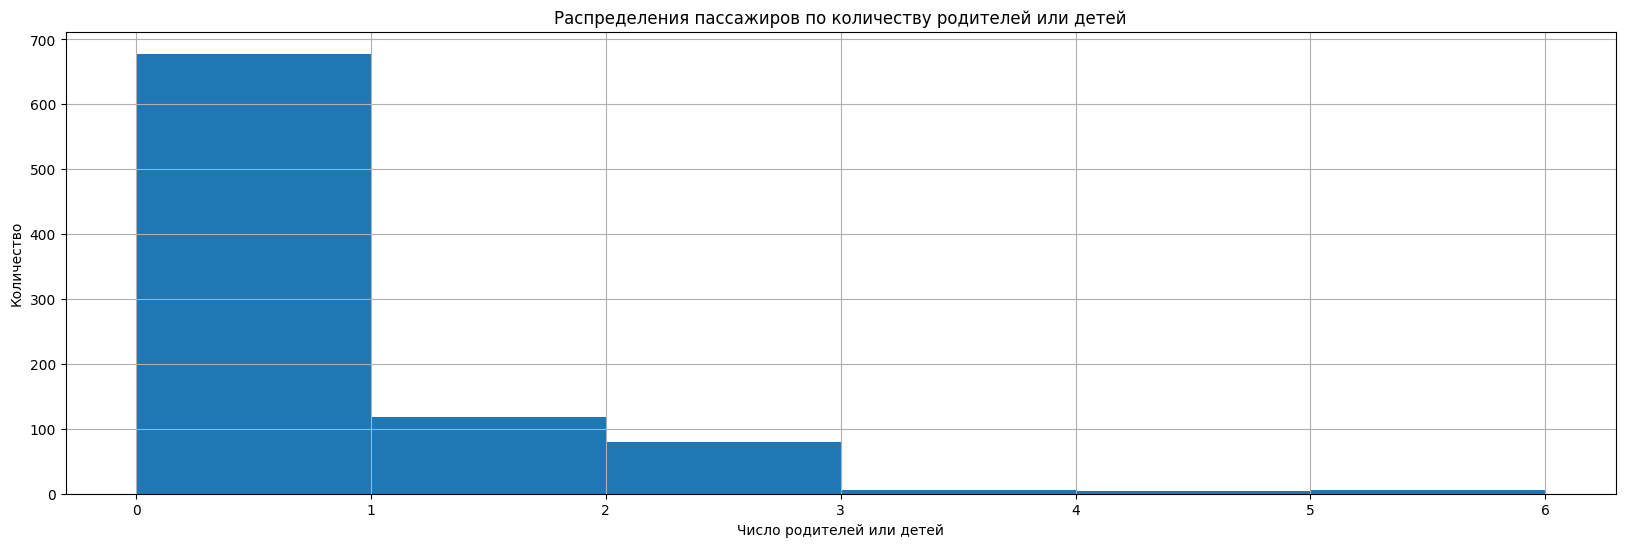

In [311]:
custom_hist(training_set["Parch"], 'Распределения пассажиров по количеству родителей или детей', 'Число родителей или детей')

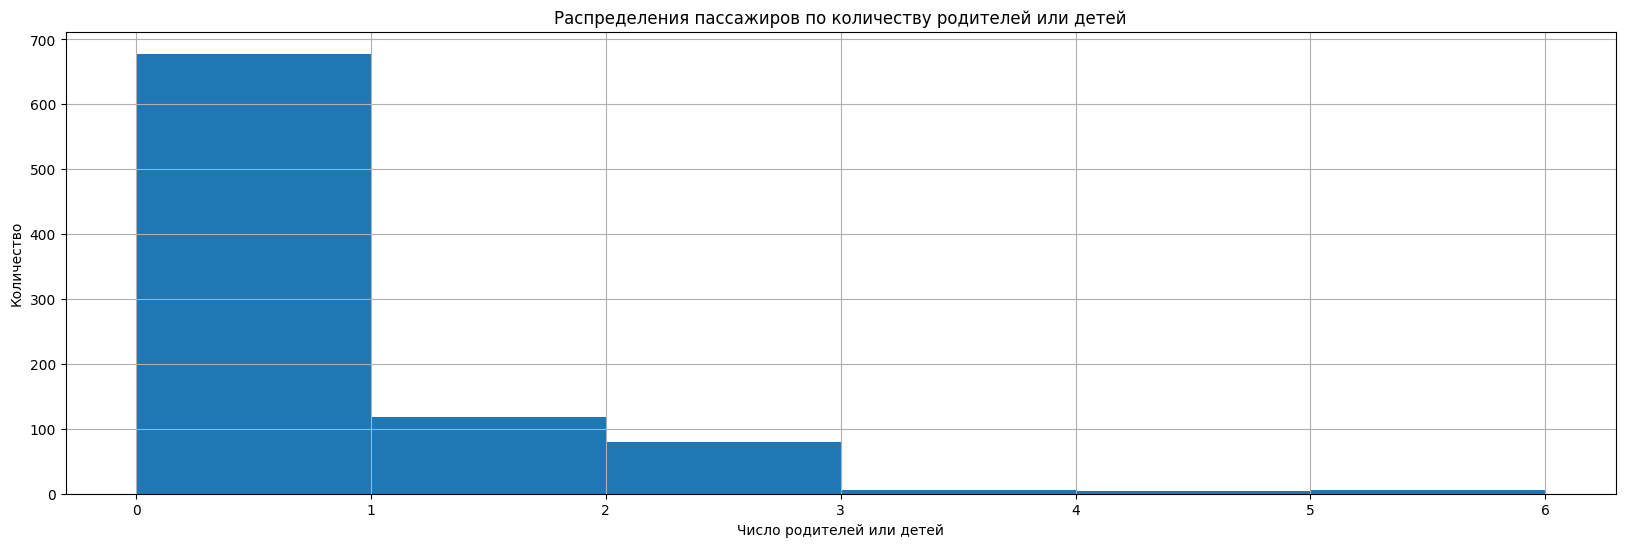

In [312]:
custom_hist(training_set["Parch"], 'Распределения пассажиров по количеству родителей или детей', 'Число родителей или детей')

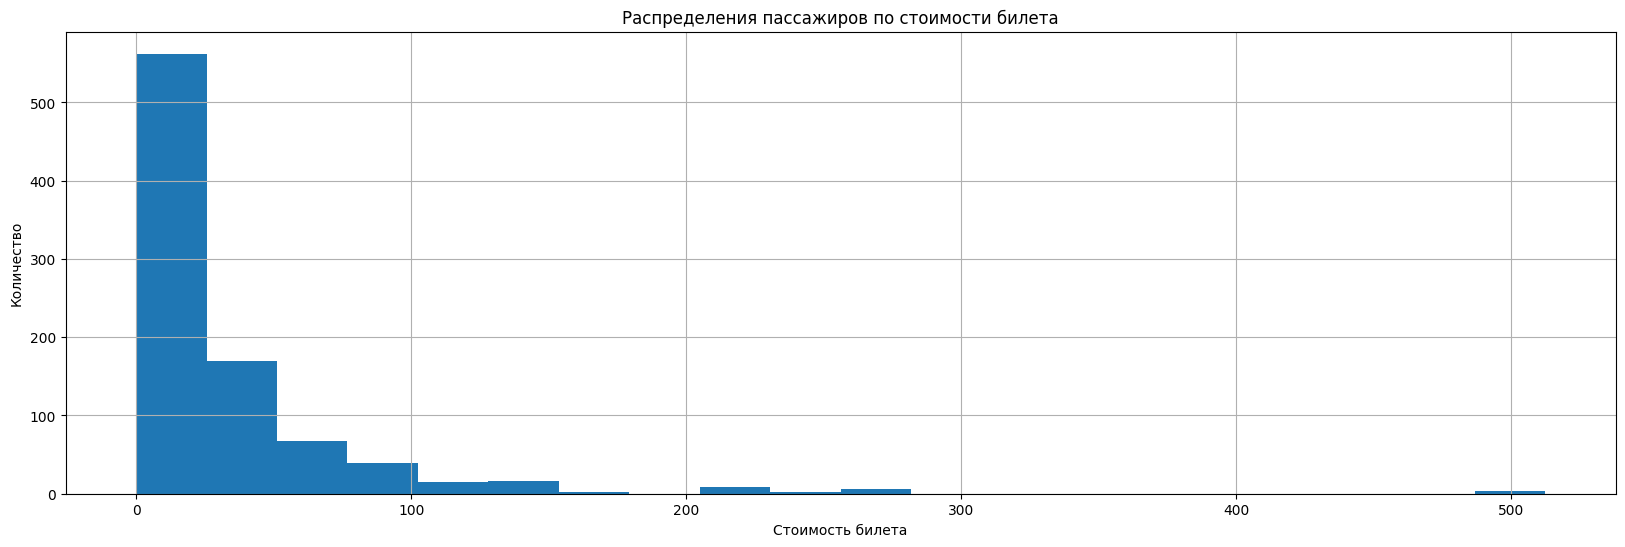

In [313]:
custom_hist(training_set["Fare"], 'Распределения пассажиров по стоимости билета', 'Стоимость билета', bins=20)

<Axes: ylabel='Frequency'>

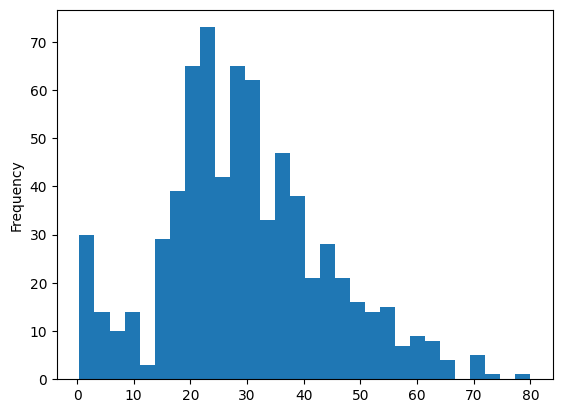

In [314]:
training_set['Age'].plot.hist(bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

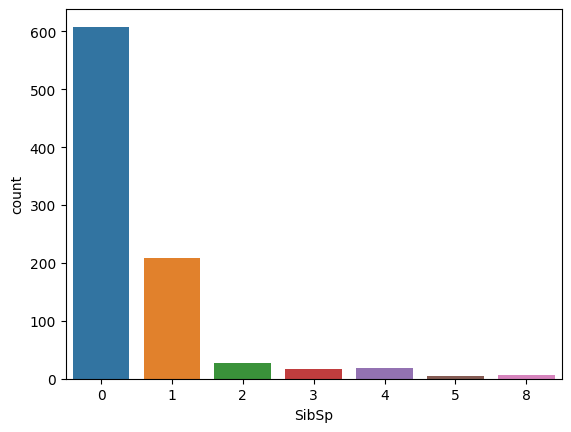

In [315]:
sns.countplot(x='SibSp', data=training_set)

<Axes: >

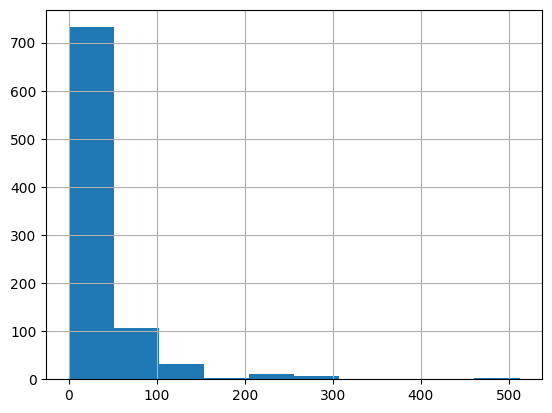

In [316]:
training_set['Fare'].hist()

<Axes: >

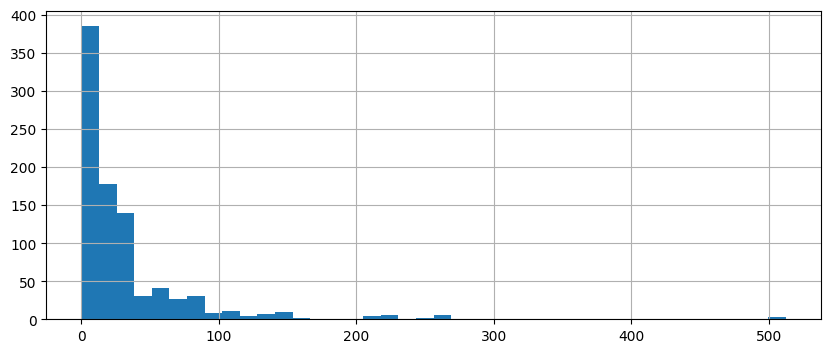

In [317]:
training_set['Fare'].hist(bins=40, figsize=(10,4))

<Axes: xlabel='Survived', ylabel='count'>

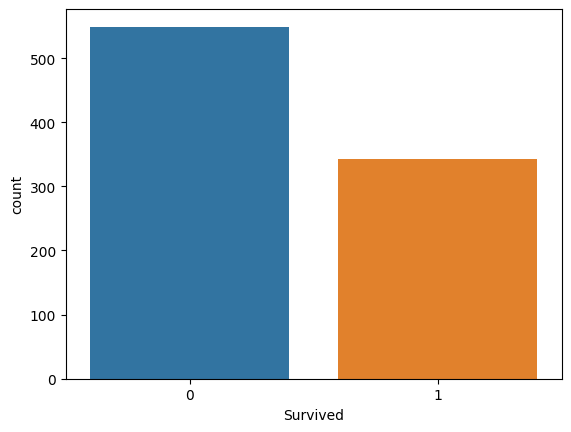

In [318]:
sns.countplot(x='Survived', data=training_set)

<Axes: xlabel='Survived', ylabel='count'>

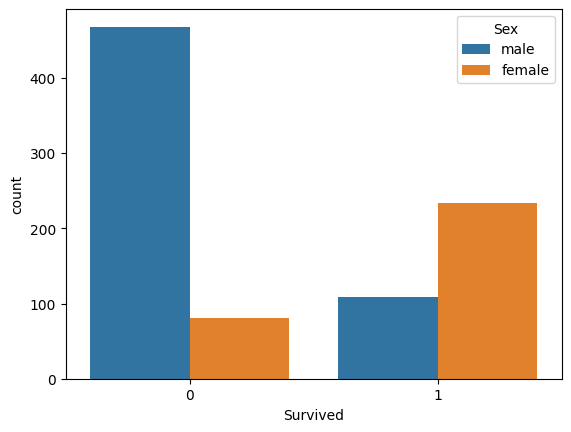

In [319]:
sns.countplot(x='Survived', data=training_set, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

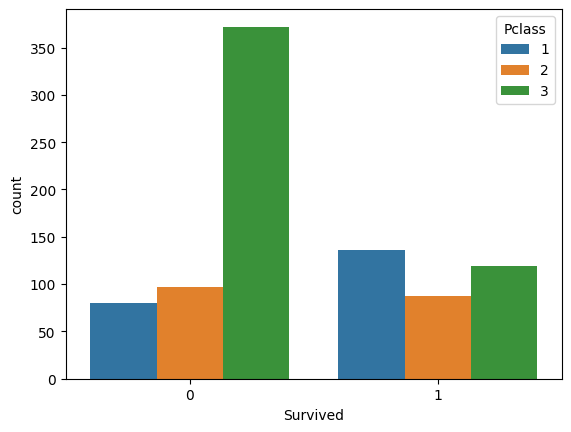

In [320]:
sns.countplot(x='Survived', data=training_set, hue='Pclass')

<Axes: xlabel='Pclass', ylabel='Age'>

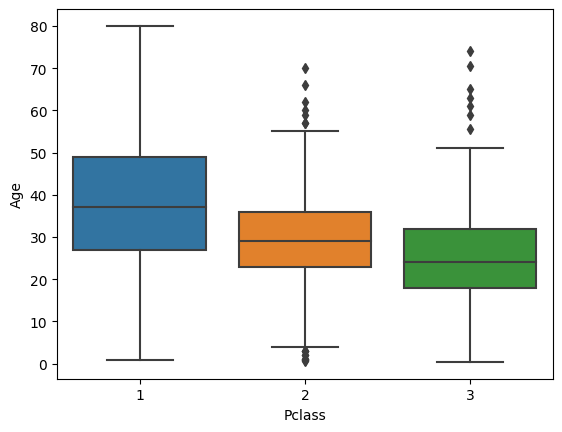

In [321]:
sns.boxplot(x='Pclass', y='Age', data=training_set)

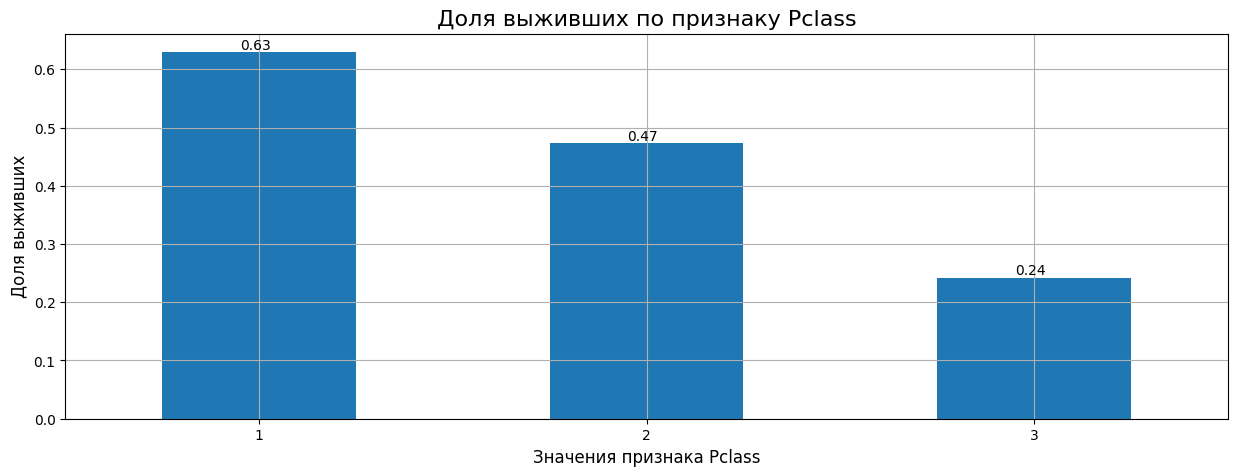

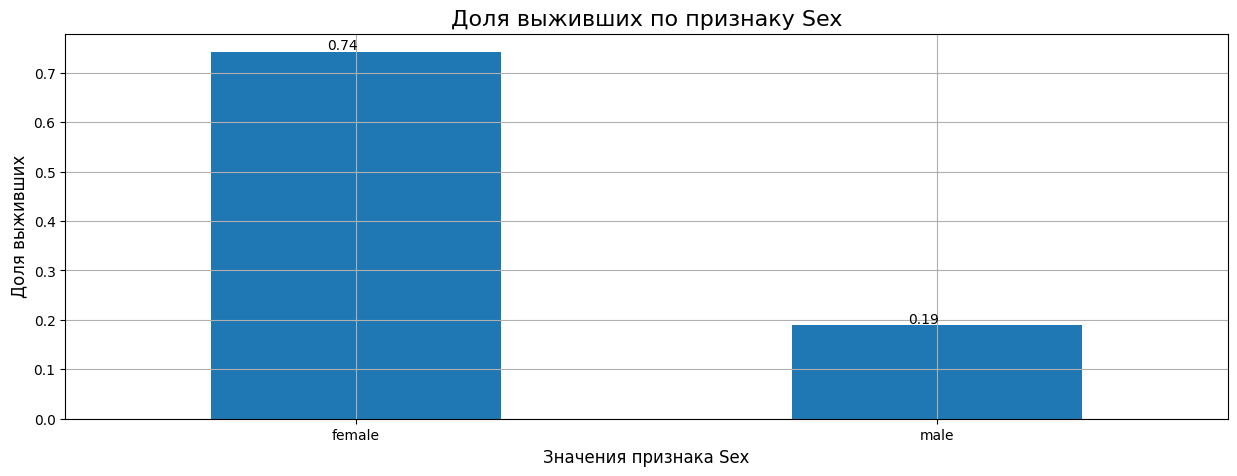

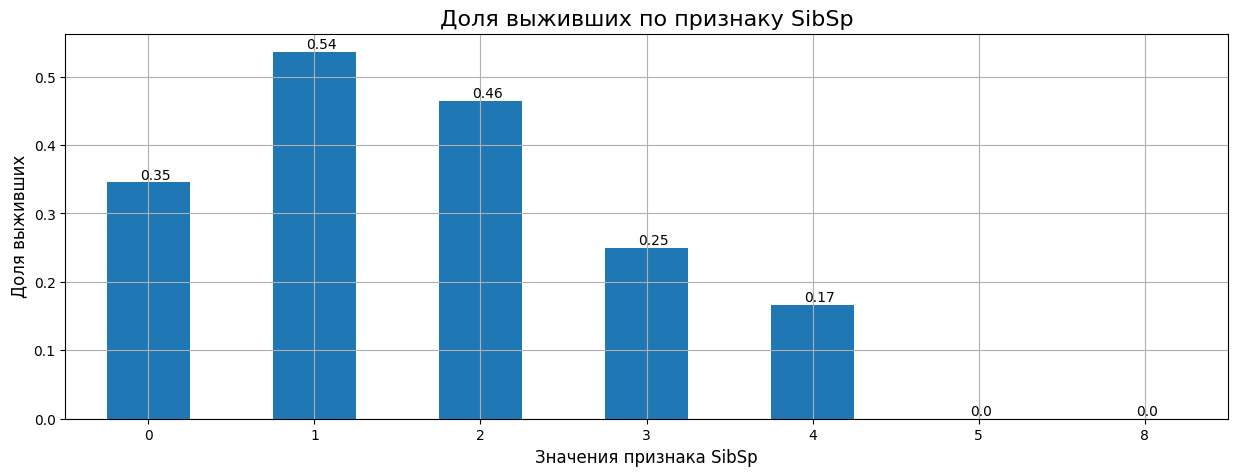

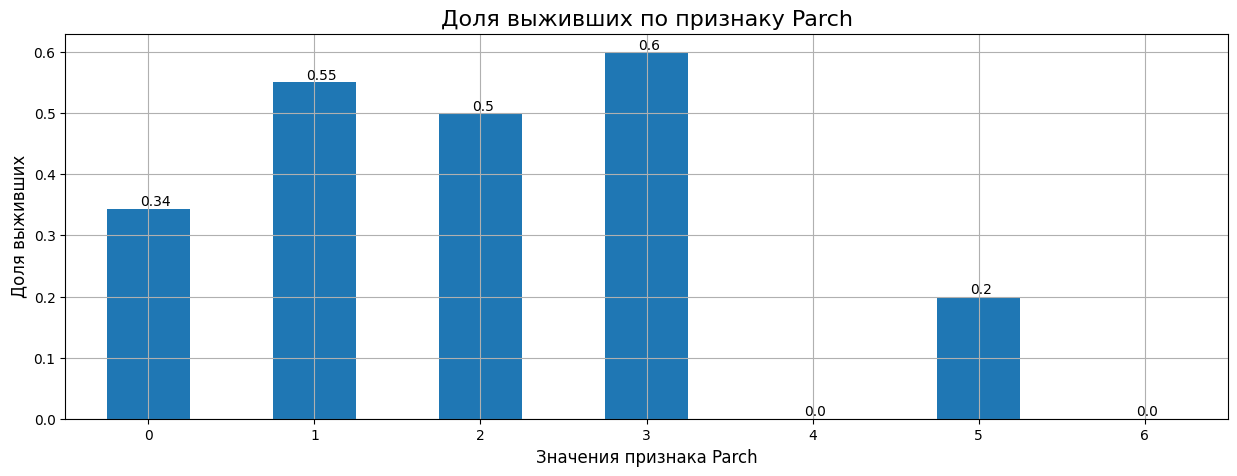

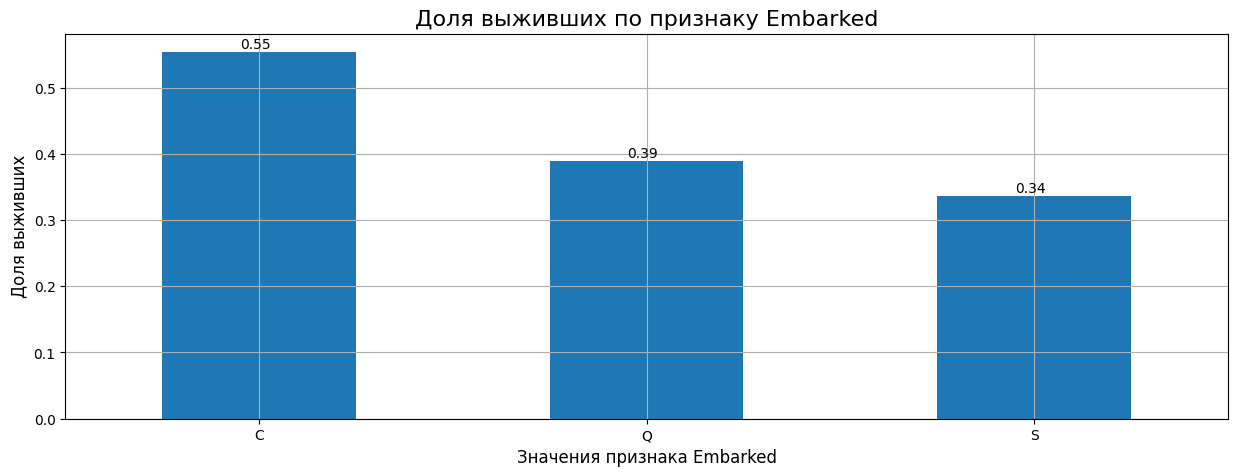

In [322]:
columns_to_look = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_look:
    pivot = training_set.pivot_table(index=column, values='Survived', aggfunc='mean')

    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_title(f'Доля выживших по признаку {column}', fontdict={'size': 16})
    ax.set_ylabel('Доля выживших', fontdict={'size': 12})
    ax.set_xlabel(column, fontdict={'size': 12})

    for cnt in range(pivot.shape[0]):
        value = pivot.iloc[cnt].values[0]
        ax.text(cnt - .05, value + .005, round(value, 2))

    pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax)
    ax.set_xlabel(f'Значения признака {column}', fontdict={'size': 12})
    plt.show()

In [323]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [324]:
# Исследование пропущенных значений
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [325]:
training_set.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

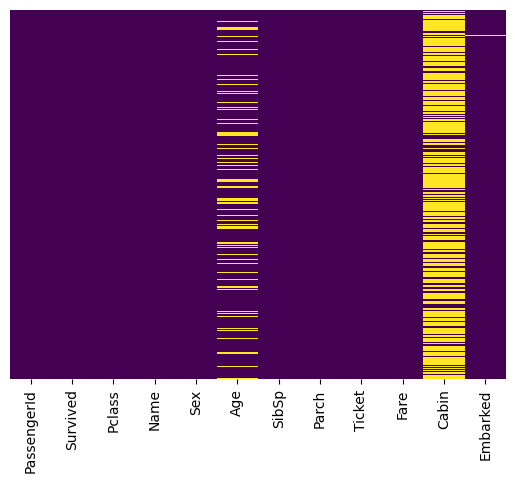

In [326]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# Визуализация представленых булевых значений (сможем увидеть где больше всего отсутствующих данных)
# Желтый цвет нам говорит о пропущенных значениях

In [327]:
training_set.drop('Cabin', axis=1, inplace=True)

In [328]:
training_set.dropna(inplace=True)

In [329]:
# Преобразование категориальных признаков
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
cat_enc_le = le.fit_transform(training_set['Sex'])

In [330]:
training_set['Sex'].unique()

array(['male', 'female'], dtype=object)

In [331]:
np.unique(cat_enc_le)

array([0, 1])

In [332]:
le.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

In [333]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(training_set[['Embarked']])  # Вызываем метод fit_transform, возвращает разреженную матрицу из библиотеки Scipy

In [334]:
training_set.shape

(712, 11)

In [335]:
cat_enc_ohe.shape

(712, 3)

In [336]:
pd.get_dummies(training_set['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
885,True,False
886,False,True
887,True,False
889,False,True


In [337]:
pd.get_dummies(training_set['Sex'], drop_first=True)

,male
0,True
1,False
2,False
3,False
4,True
...,...
885,False
886,True
887,False
889,True


In [338]:
sex = pd.get_dummies(training_set['Sex'], drop_first=True)

In [339]:
embark = pd.get_dummies(training_set['Embarked'], drop_first=True)

In [340]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [341]:
training_set = pd.concat([training_set, sex, embark], axis=1)

In [342]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [343]:
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [344]:
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


# Задания для самостоятельного выполнения

# 1. Постройте по получившемуся набору данных простую модель машинного обучения и оцените ее эффективность.

In [345]:
X = training_set[['Pclass', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = training_set['Survived']

In [282]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.7972027972027972


In [283]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



# 2. Ответьте на следующие вопросы при помощи визуализации и численных данных по исходному набору данных:
# 3. Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

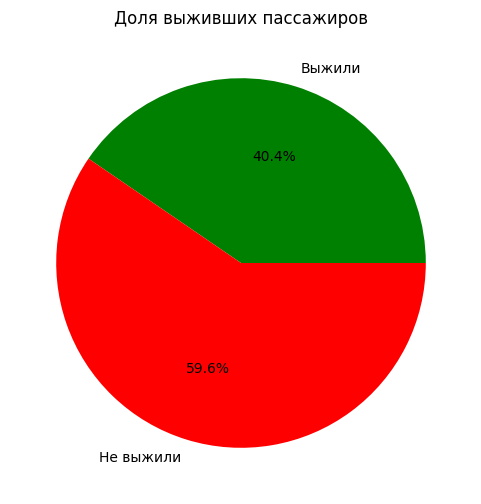

In [284]:
plt.figure(figsize=(6, 6))
plt.title(f'Доля выживших пассажиров')
plt.pie([survived_rate, 1-survived_rate], labels=['Выжили', 'Не выжили'], colors=['green', 'red'], autopct='%1.1f%%')
plt.show()

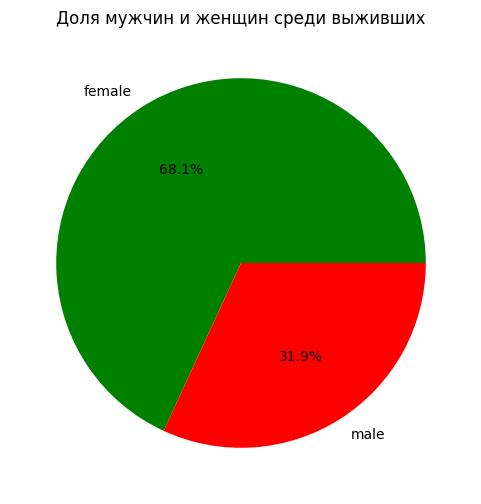

In [285]:
training_set = pd.read_csv('C:\\Users\\222844\\Downloads\\titanic.csv')

survived = training_set[training_set['Survived'] == 1]
survived_sex_rate = survived['Sex'].value_counts(normalize=True)
plt.figure(figsize=(6, 6))
plt.title('Доля мужчин и женщин среди выживших')
plt.pie(survived_sex_rate, labels=survived_sex_rate.index, colors=['green', 'red'], autopct='%1.1f%%')
plt.show()

In [286]:
training_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 4. Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [287]:
class_counts = training_set['Pclass'].value_counts()
print(f'Количество пассажиров в каждом классе: {class_counts}')
print('----------------------------')
print(f'Самый многолюдный класс: {class_counts.idxmax()}')

Количество пассажиров в каждом классе: Pclass
3    491
1    216
2    184
Name: count, dtype: int64
----------------------------
Самый многолюдный класс: 3


In [288]:
most_populous_class_sex_counts = training_set[training_set['Pclass'] == most_populous_class]['Sex'].value_counts()
print(f'Мужчин и женщин в классе {most_populous_class}:')
most_populous_class_sex_counts

Мужчин и женщин в классе 3:


Sex
male      347
female    144
Name: count, dtype: int64

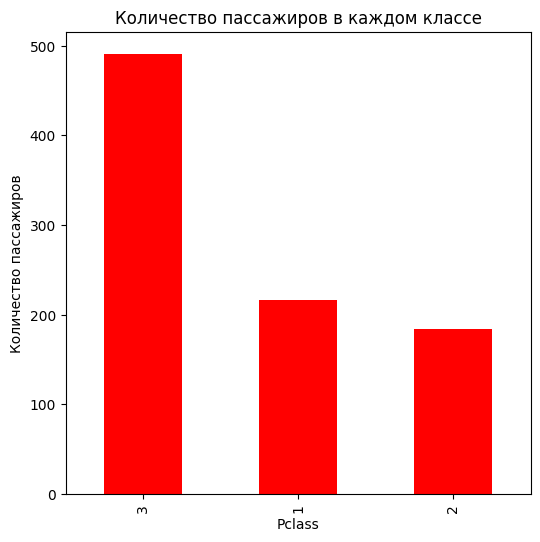

In [289]:
plt.figure(figsize=(6, 6))
plt.title('Количество пассажиров в каждом классе')
class_counts.plot(kind='bar', color = 'r')
plt.ylabel('Количество пассажиров')
plt.show()

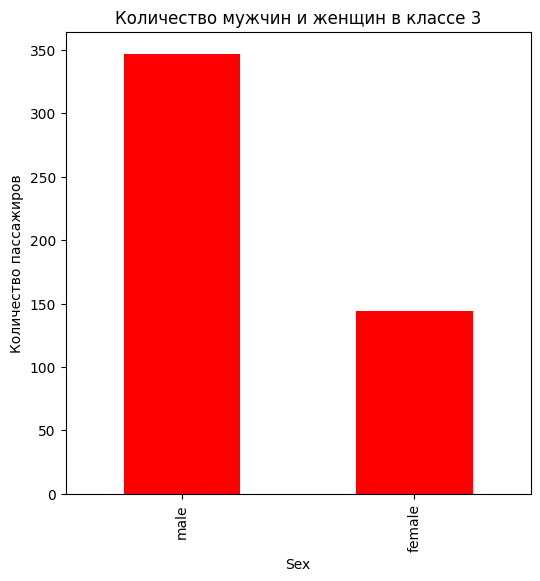

In [290]:
plt.figure(figsize=(6, 6))
plt.title(f'Количество мужчин и женщин в классе {most_populous_class}')
most_populous_class_sex_counts.plot(kind='bar', color='r') 
plt.ylabel('Количество пассажиров')
plt.show()

# 5. Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

Все выбранные классы не несут никакой полехной информации в Предварительной обработки данных

In [291]:
training_set.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
training_set

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


# 6. Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение диаграммы рассеяния).

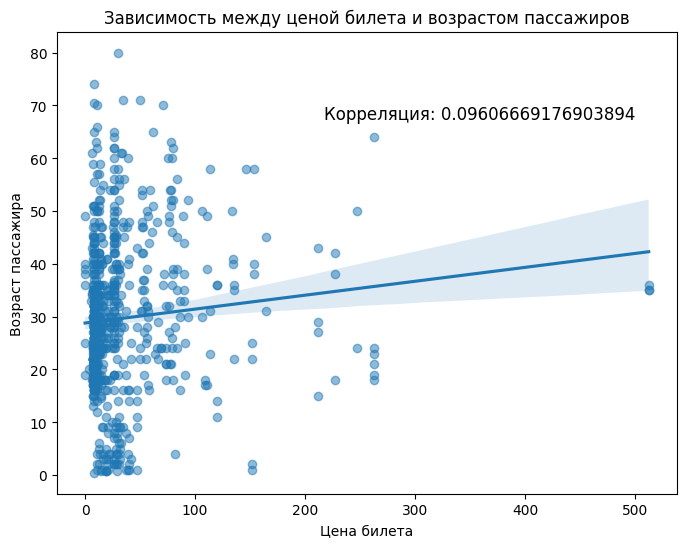

In [292]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Fare', y='Age', data=training_set, scatter_kws={'alpha':0.5})
plt.title('Зависимость между ценой билета и возрастом пассажиров')
plt.xlabel('Цена билета')
plt.ylabel('Возраст пассажира')
plt.text(500, 70, f'Корреляция: {correlation}', fontsize=12, ha='right', va='top')
plt.show()

# 7. Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

Средняя выживаемость по цене билета:
Fare
0.0000      0.066667
4.0125      0.000000
5.0000      0.000000
6.2375      0.000000
6.4375      0.000000
              ...   
227.5250    0.750000
247.5208    0.500000
262.3750    1.000000
263.0000    0.500000
512.3292    1.000000
Name: Survived, Length: 248, dtype: float64


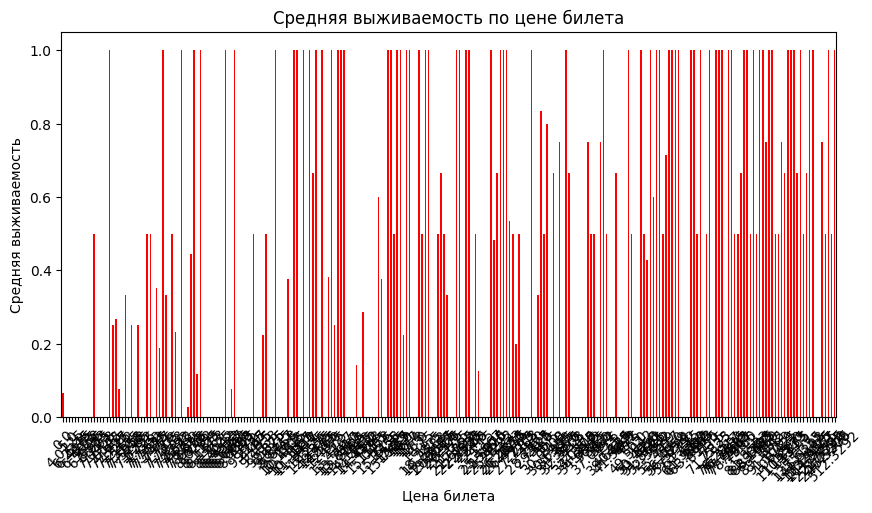

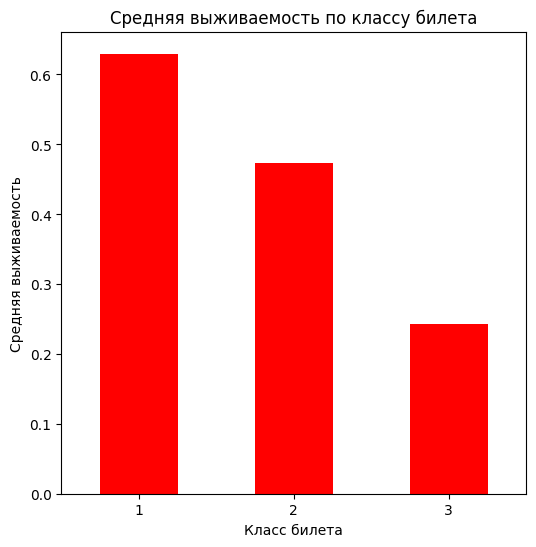

In [293]:
average_survival_by_fare = training_set.groupby('Fare')['Survived'].mean()
average_survival_by_pclass = training_set.groupby('Pclass')['Survived'].mean()

print('Средняя выживаемость по цене билета:')
print(average_survival_by_fare)

plt.figure(figsize=(10, 5))
average_survival_by_fare.plot(kind='bar', color='r')
plt.title('Средняя выживаемость по цене билета')
plt.xlabel('Цена билета')
plt.ylabel('Средняя выживаемость')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 6))
average_survival_by_pclass.plot(kind='bar', color='r')
plt.title('Средняя выживаемость по классу билета')
plt.xlabel('Класс билета')
plt.ylabel('Средняя выживаемость')
plt.xticks(rotation=0)
plt.show()


# 8. Какова связь между стоимостью билета и портом отправления? Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне.

In [294]:
training_set = pd.read_csv('C:\\Users\\222844\\Downloads\\titanic.csv')

In [295]:
min_fare = training_set['Fare'].min()
mean_fare = training_set['Fare'].mean()
max_fare = training_set['Fare'].max()

print(f'Для всех пассажиров:')
print(f'Минимальная стоимость билета: {min_fare}')
print(f'Средняя стоимость билета: {mean_fare}')
print(f'Максимальная стоимость билета: {max_fare}')
print('-----------------')

southampton_passengers = training_set[training_set['Embarked'] == 'S']
min_fare_s = southampton_passengers['Fare'].min()
mean_fare_s = southampton_passengers['Fare'].mean()
max_fare_s = southampton_passengers['Fare'].max()

print('Для пассажиров, которые сели на корабль в Саутгемптоне:')
print(f'Минимальная стоимость билета: {min_fare_s}')
print(f'Средняя стоимость билета: {mean_fare_s}')
print(f'Максимальная стоимость билета: {max_fare_s}')
print('-----------------')

average_fare_by_embarkation = training_set.groupby('Embarked')['Fare'].mean()

print('Средняя стоимость билета по портам отправления:')
print(average_fare_by_embarkation)

Для всех пассажиров:
Минимальная стоимость билета: 0.0
Средняя стоимость билета: 32.204207968574636
Максимальная стоимость билета: 512.3292
-----------------
Для пассажиров, которые сели на корабль в Саутгемптоне:
Минимальная стоимость билета: 0.0
Средняя стоимость билета: 27.079811801242233
Максимальная стоимость билета: 263.0
-----------------
Средняя стоимость билета по портам отправления:
Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


# 9. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

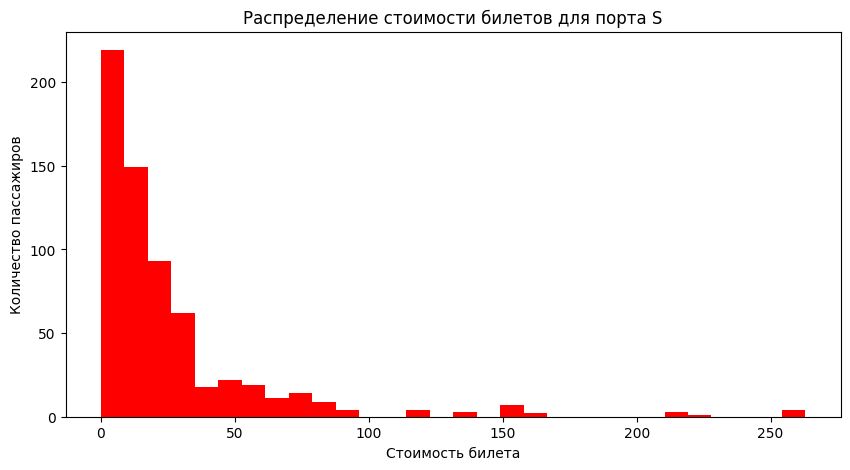

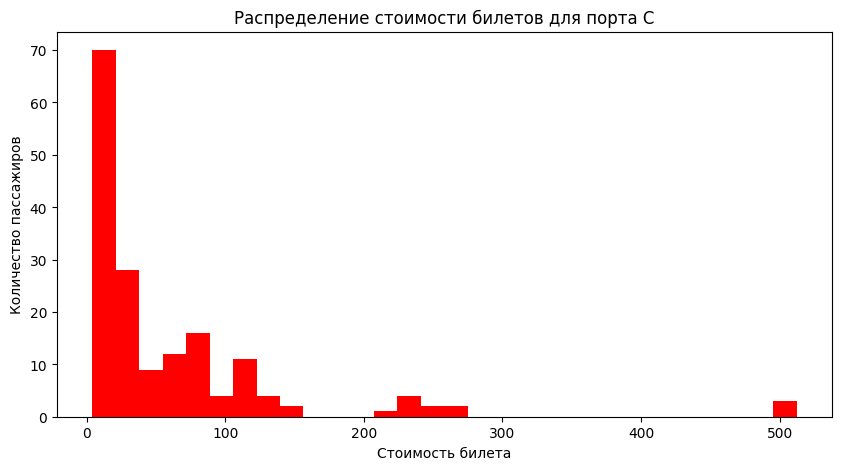

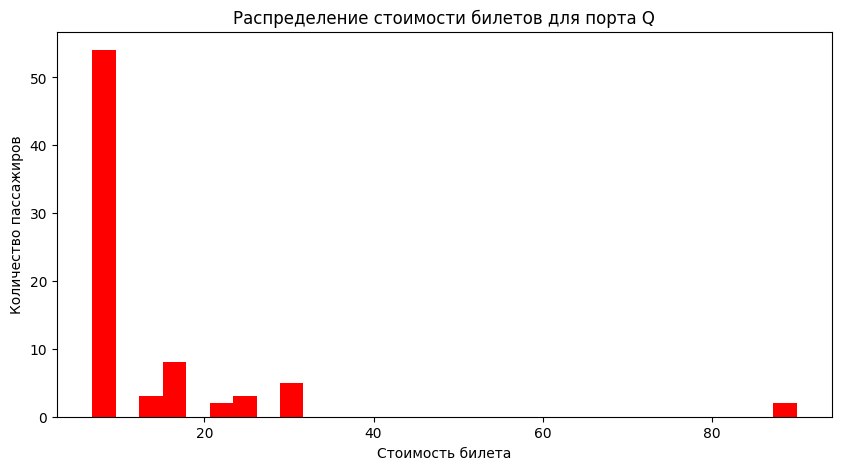

In [296]:
for port in training_set['Embarked'].unique():
    if pd.isna(port):
        continue
    plt.figure(figsize=(10, 5))
    plt.hist(training_set[training_set['Embarked'] == port]['Fare'], bins=30, color='red')
    plt.title(f'Распределение стоимости билетов для порта {port}')
    plt.xlabel('Стоимость билета')
    plt.ylabel('Количество пассажиров')
    plt.show()


# 10. Оцените репрезентативность представленной выборки. Сколько всего было пассажиров Титаника? Сколько из них выжило? Какую долю составляет представленный набор данных от всей генеральной совокупности?

In [297]:
passengers_in_dataset = len(training_set)
survivors_in_dataset = training_set['Survived'].sum()
total_passengers_titanic = 2224
total_survivors_titanic = 710
representation_ratio = passengers_in_dataset / total_passengers_titanic
print(f"Количество пассажиров в наборе данных: {passengers_in_dataset}")
print(f"Количество выживших в наборе данных: {survivors_in_dataset}")
print(f"Доля представленной выборки от всей генеральной совокупности: {representation_ratio:.2%}")

Количество пассажиров в наборе данных: 891
Количество выживших в наборе данных: 342
Доля представленной выборки от всей генеральной совокупности: 40.06%


# 11. Разделите выборку на тестовую и обучающую части при помощи train_test_split(). Изобразите на графиках распределение некоторых атрибутов и целевой переменной. Насколько однородно получившееся разбиение?

In [298]:
training_set

X = training_set[['Pclass', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]
y = training_set['Survived']

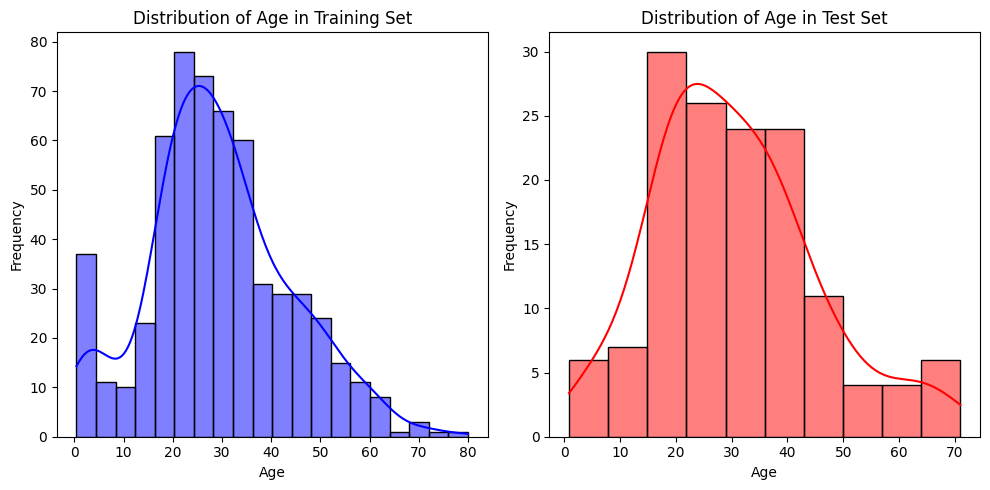

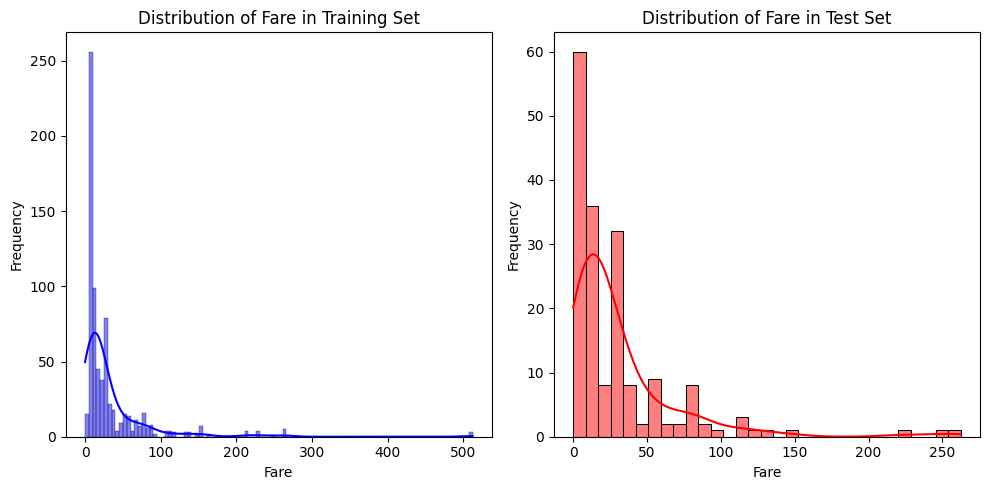

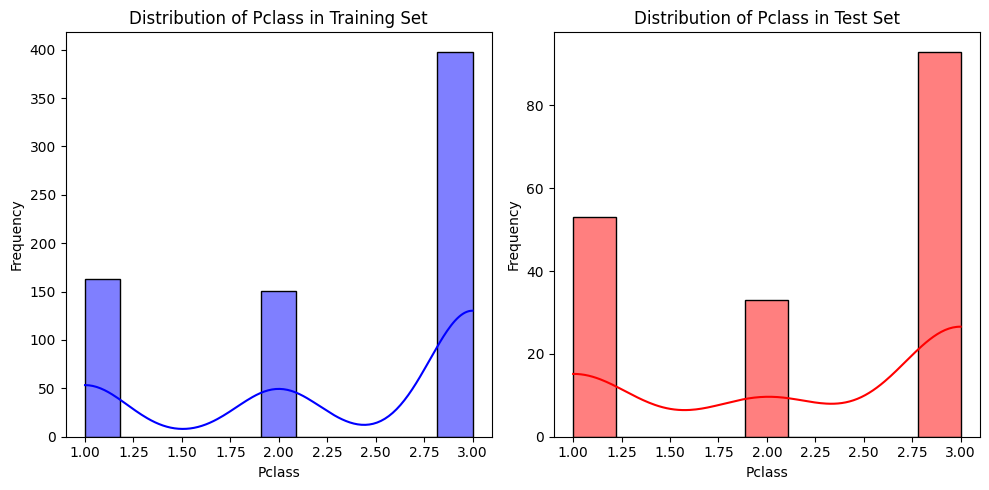

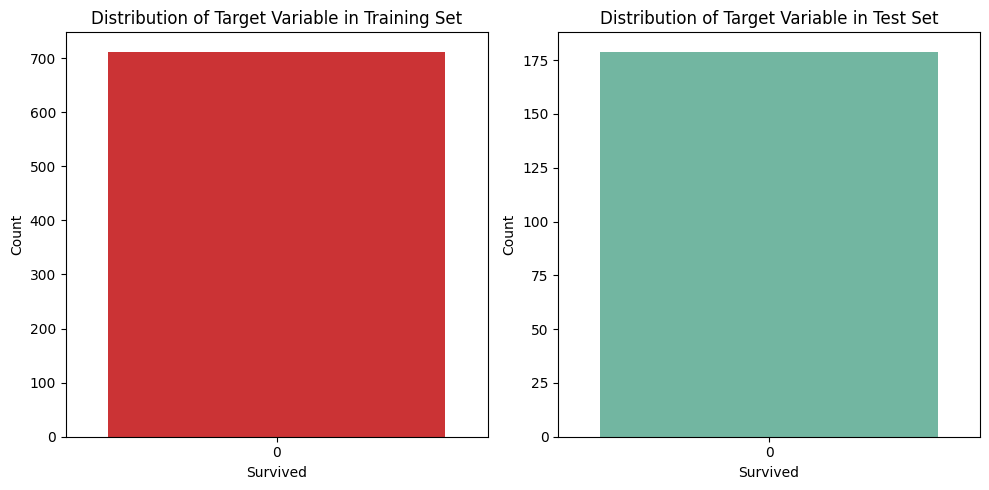

In [299]:
from sklearn.model_selection import train_test_split

X = training_set.drop('Survived', axis=1)
y = training_set['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

attributes_to_plot = ['Age', 'Fare', 'Pclass']
for attribute in attributes_to_plot:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[attribute], kde=True, color='blue')
    plt.title(f'Distribution of {attribute} in Training Set')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.subplot(1, 2, 2)
    sns.histplot(X_test[attribute], kde=True, color='red')
    plt.title(f'Distribution of {attribute} in Test Set')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(y_train, palette='Set1')
plt.title('Distribution of Target Variable in Training Set')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(y_test.values, palette='Set2')
plt.title('Distribution of Target Variable in Test Set')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



# 12. Сбалансируйте классы в исходном датасете двумя способами:
# 13. Удалите лишние объекты мажоритарного класса (выбранные случайно)

In [300]:
class_counts = training_set['Survived'].value_counts()

majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

if class_counts.max() == class_counts.min():
    print("Классы уже сбалансированы.")
else:
    objects_to_remove = class_counts[majority_class] - class_counts[minority_class]
    majority_class_indices = training_set[training_set['Survived'] == majority_class].index
    indices_to_remove = np.random.choice(majority_class_indices, size=objects_to_remove, replace=False)
    balanced_dataset = training_set.drop(indices_to_remove)

    print(f"Исходное количество объектов мажоритарного класса: {class_counts[majority_class]}")
    print(f"Исходное количество объектов миноритарного класса: {class_counts[minority_class]}")
    print('----------------------------------------------------------------')
    print(f"Количество удаленных объектов мажоритарного класса: {objects_to_remove}")
    print('----------------------------------------------------------------')
    print(f"Финальное количество объектов мажоритарного класса: {class_counts[majority_class] - objects_to_remove}")
    print(f"Финальное количество объектов миноритарного класса: {class_counts[minority_class]}")


Исходное количество объектов мажоритарного класса: 549
Исходное количество объектов миноритарного класса: 342
----------------------------------------------------------------
Количество удаленных объектов мажоритарного класса: 207
----------------------------------------------------------------
Финальное количество объектов мажоритарного класса: 342
Финальное количество объектов миноритарного класса: 342


# 14. Добавьте в выборку дубликаты миноритарного класса.

In [301]:
class_counts = training_set['Survived'].value_counts()

majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

if class_counts.max() == class_counts.min():
    print("Классы уже сбалансированы.")
else:
    objects_to_add = class_counts[majority_class] - class_counts[minority_class]
    minority_class_indices = training_set[training_set['Survived'] == minority_class].index
    indices_to_add = np.random.choice(minority_class_indices, size=objects_to_add, replace=True)
    duplicated_minority_samples = training_set.loc[indices_to_add]
    balanced_dataset = pd.concat([training_set, duplicated_minority_samples])

    print(f"Исходное количество объектов мажоритарного класса: {class_counts[majority_class]}")
    print(f"Исходное количество объектов миноритарного класса: {class_counts[minority_class]}")
    print('----------------------------------------------------------------')
    print(f"Количество добавленных объектов миноритарного класса: {objects_to_add}")
    print('----------------------------------------------------------------')
    print(f"Финальное количество объектов мажоритарного класса: {class_counts[majority_class]}")
    print(f"Финальное количество объектов миноритарного класса: {class_counts[minority_class] + objects_to_add}")


Исходное количество объектов мажоритарного класса: 549
Исходное количество объектов миноритарного класса: 342
----------------------------------------------------------------
Количество добавленных объектов миноритарного класса: 207
----------------------------------------------------------------
Финальное количество объектов мажоритарного класса: 549
Финальное количество объектов миноритарного класса: 549


# 15. Проведите исследование эффективности простой модели классификации до и после данных преобразований.

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [363]:
X = training_set[['Pclass', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = training_set['Survived']
X = X.fillna(X.mean())

minority_class_upsampled = minority_class.sample(n=len(majority_class), replace=True, random_state=42)
balanced_training_set = pd.concat([majority_class, minority_class_upsampled])

X_balanced = balanced_training_set.drop('Survived', axis=1)
y_balanced = balanced_training_set['Survived']

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
X_train_balanced =  X_train_balanced.fillna(X_train_balanced.mean())
X_test_balanced = X_test_balanced.fillna(X_test_balanced.mean())

model_balanced = LogisticRegression()
model_balanced.fit(X_train_balanced, y_train_balanced)
predictions_balanced = model_balanced.predict(X_test_balanced)

In [364]:
print('Эффективность модели до балансировки классов:')
print(classification_report(y_test, predictions))
print()
print('Эффективность модели после балансировки классов:')
print(classification_report(y_test_balanced, predictions_balanced))

Эффективность модели до балансировки классов:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143


Эффективность модели после балансировки классов:
              precision    recall  f1-score   support

           0       0.72      0.89      0.80        80
           1       0.88      0.70      0.78        90

    accuracy                           0.79       170
   macro avg       0.80      0.79      0.79       170
weighted avg       0.80      0.79      0.79       170



# 16. Постройте корреляционную матрицу признаков после преобразования данных. Сделайте вывод о наличии либо отсутствии мультиколлинеарности признаков.

<Figure size 1000x800 with 0 Axes>

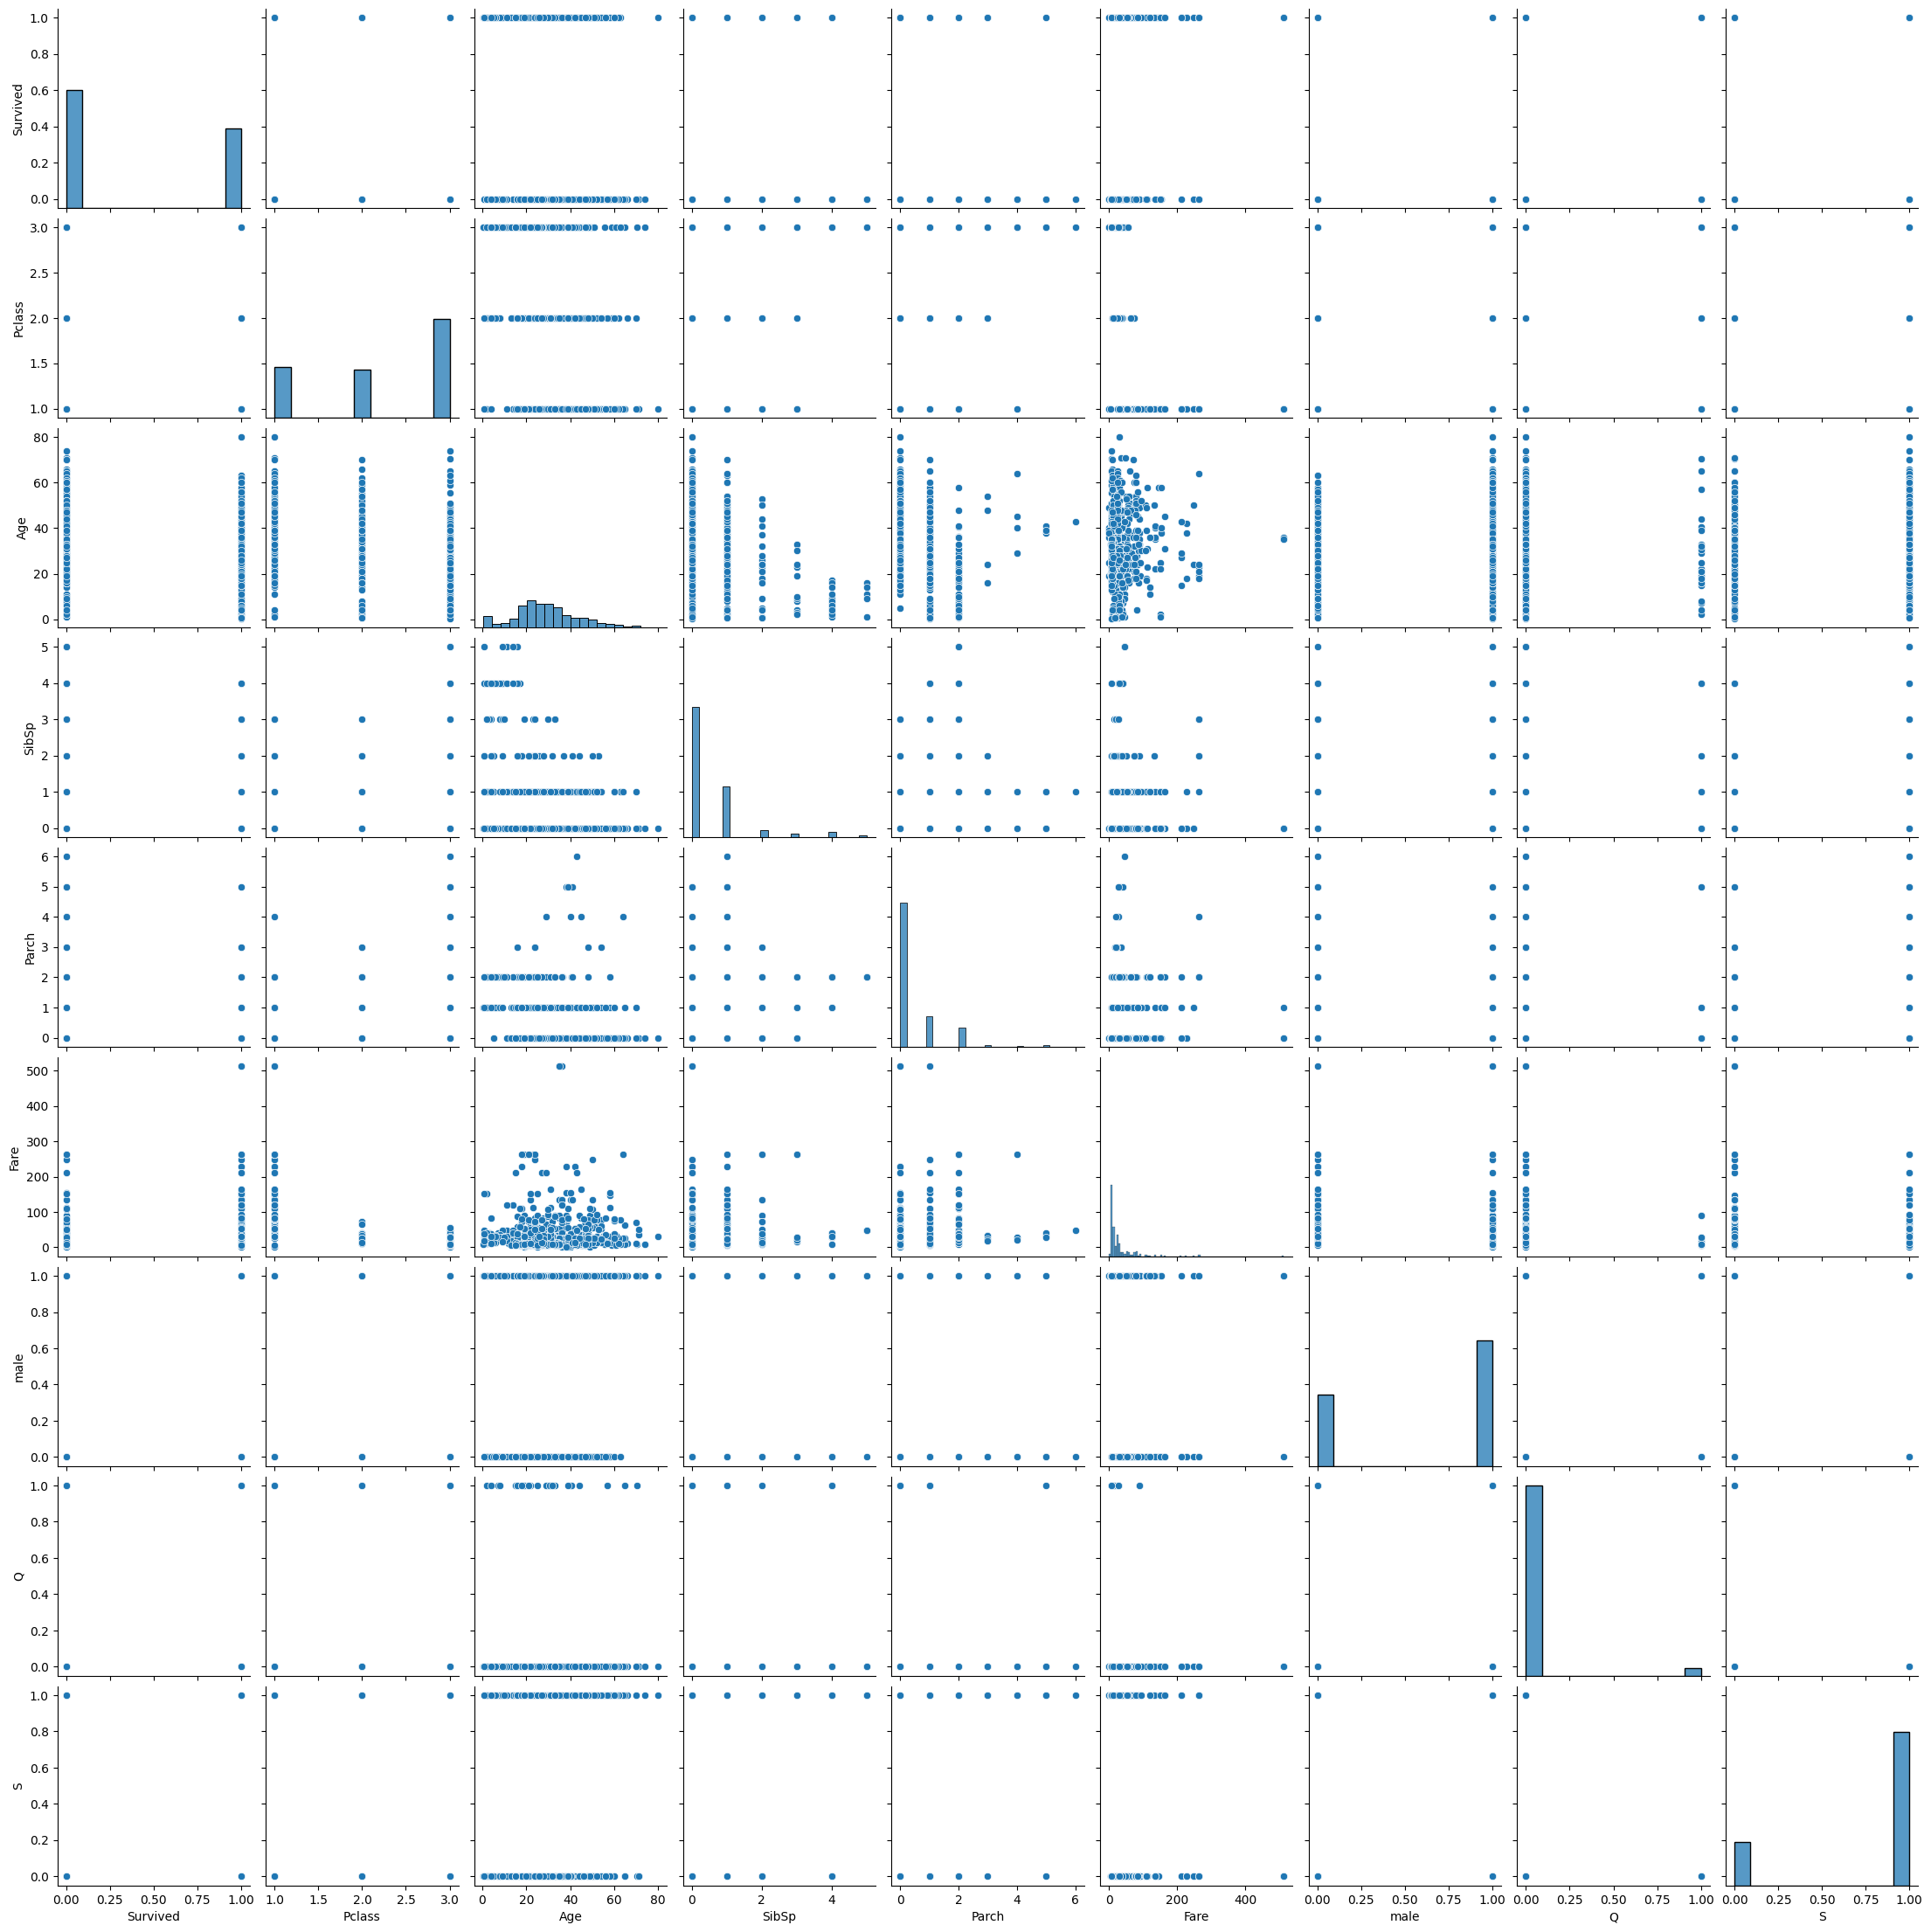

In [366]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = training_set.corr()

plt.figure(figsize=(10, 8))
sns.pairplot(training_set, kind="scatter")
plt.show()


<Axes: >

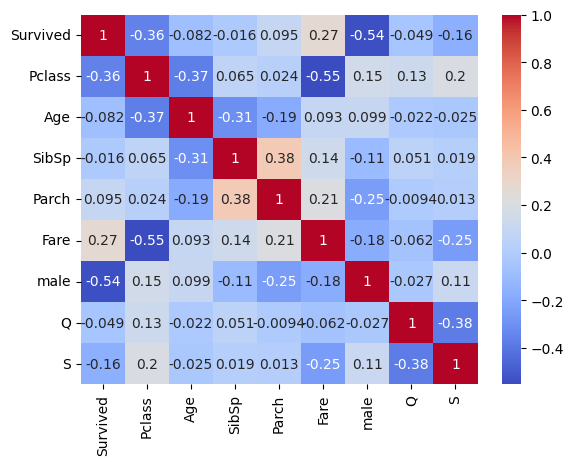

In [367]:
sns.heatmap(training_set.corr(), annot=True, cmap='coolwarm')

# 17. Проведите группировку данных по значению возраста. Введите новый признак "возрастная категория", значениями которой будут "ребенок", "взрослый", "старик". Проведите анализ эффективности данного признака.

Значение критерия Хи-квадрат: 12.303586723743816
p-значение: 0.0021296590939222336


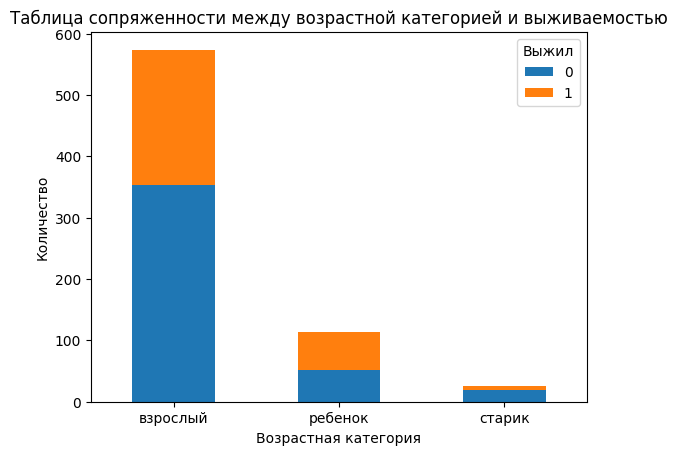

In [369]:
def categorize_age(age):
    if age < 18:
        return 'ребенок'
    elif age >= 18 and age < 60:
        return 'взрослый'
    else:
        return 'старик'

training_set['возрастная категория'] = training_set['Age'].apply(categorize_age)

contingency_table = pd.crosstab(training_set['возрастная категория'], training_set['Survived'])


from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Значение критерия Хи-квадрат:", chi2)
print("p-значение:", p)

contingency_table.plot(kind='bar', stacked=True)
plt.title('Таблица сопряженности между возрастной категорией и выживаемостью')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.legend(title='Выжил', loc='upper right')
plt.show()